In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load only necessary columns in chunks
use_cols = ['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
            'Weather_Condition', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
            'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)',
            'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
            'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
            'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset']

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/US_Accidents_March23.csv', usecols=use_cols, low_memory=False)

df.shape


(7728394, 27)

In [3]:
# Convert Start_Time to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract hour of day and day of week
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()

# Drop rows with too many nulls in important columns
df = df.dropna(subset=['Start_Lat', 'Start_Lng', 'Weather_Condition', 'Visibility(mi)', 'Start_Time'])

df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Hour,DayOfWeek
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,2016-02-08 05:58:00,36.9,91.0,29.68,...,False,False,False,False,False,False,False,Night,5.0,Monday
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,2016-02-08 05:51:00,37.9,100.0,29.65,...,False,False,False,False,False,False,False,Night,6.0,Monday
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,2016-02-08 06:56:00,36.0,100.0,29.67,...,False,False,False,False,False,False,True,Night,6.0,Monday
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,2016-02-08 07:38:00,35.1,96.0,29.64,...,False,False,False,False,False,False,False,Night,7.0,Monday
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,2016-02-08 07:53:00,36.0,89.0,29.65,...,False,False,False,False,False,False,True,Day,7.0,Monday


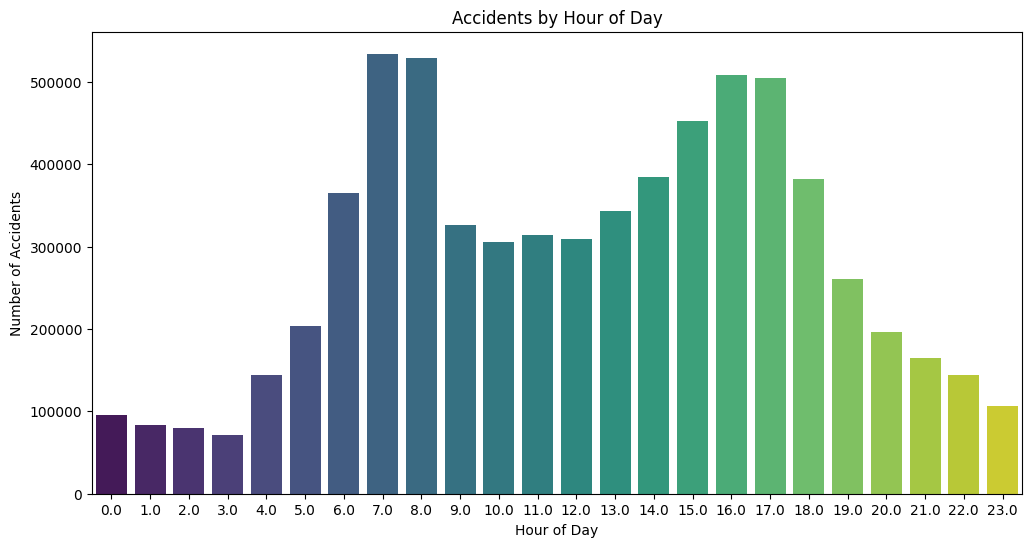

In [4]:
#STEP 3: Accidents by Time of Day
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

/tmp/ipython-input-5-1085015340.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity', data=df, palette='pastel')


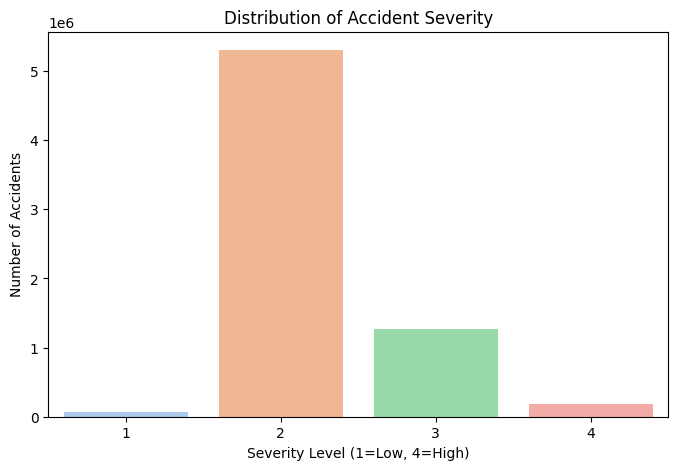

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Severity', data=df, palette='pastel')
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity Level (1=Low, 4=High)')
plt.ylabel('Number of Accidents')
plt.show()

/tmp/ipython-input-6-3658279169.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Weather_Condition', data=weather_df, order=top_weather, palette='magma')


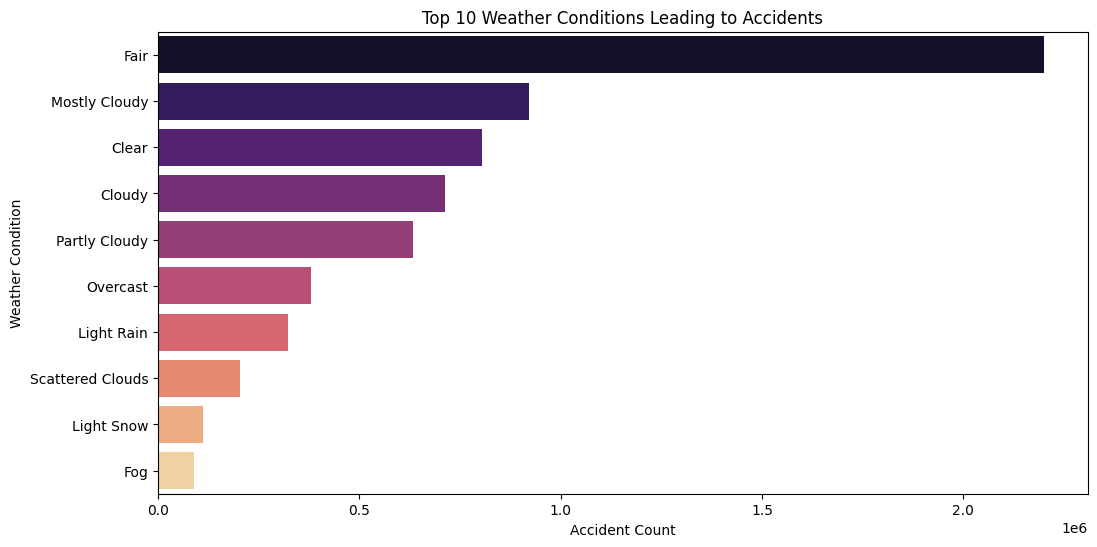

In [6]:
# STEP 4: Weather Conditions Impact
top_weather = df['Weather_Condition'].value_counts().nlargest(10).index
weather_df = df[df['Weather_Condition'].isin(top_weather)]

plt.figure(figsize=(12,6))
sns.countplot(y='Weather_Condition', data=weather_df, order=top_weather, palette='magma')
plt.title('Top 10 Weather Conditions Leading to Accidents')
plt.xlabel('Accident Count')
plt.ylabel('Weather Condition')
plt.show()

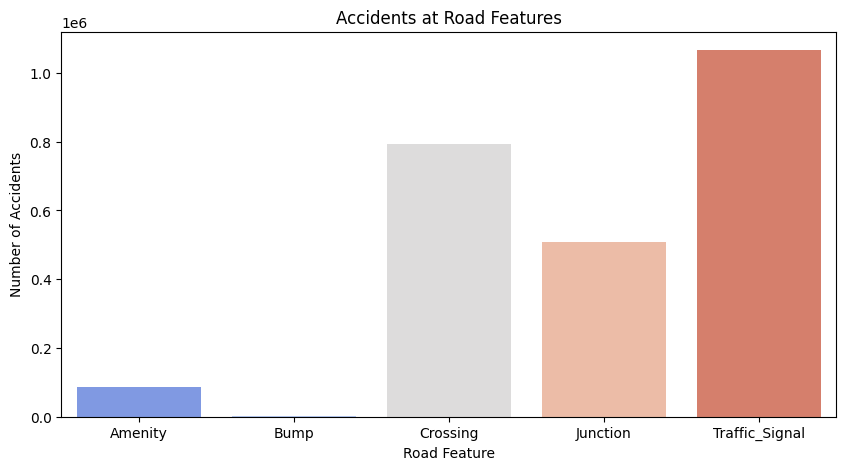

In [7]:
# STEP 5: Road Feature Contributions
road_features = ['Amenity', 'Bump', 'Crossing', 'Junction', 'Traffic_Signal']
feature_counts = {f: df[f].sum() for f in road_features}

plt.figure(figsize=(10,5))
sns.barplot(x=list(feature_counts.keys()), y=list(feature_counts.values()), palette='coolwarm')
plt.title('Accidents at Road Features')
plt.ylabel('Number of Accidents')
plt.xlabel('Road Feature')
plt.show()

In [8]:
# STEP 6: Accident Hotspots (Heatmap)
!pip install folium
import folium
from folium.plugins import HeatMap

# Sample 10,000 rows for heatmap
map_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(n=10000)

m = folium.Map(location=[37.0902, -95.7129], zoom_start=5)
HeatMap(data=map_df[['Start_Lat', 'Start_Lng']], radius=8).add_to(m)
m